# Tarea 2 Modulo 2

Traducción a español y tropicalización: Tobias Alexander Santamaria Diaz

Dataset a utilizar: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

Objetivos del Proyecto:
K-fold y cross-validation

### Declaracion de Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Se define el tipo de modelo a usar
model = LinearRegression()

In [3]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv("./dataset/Customer-Churn-Records.csv")  # Lee el archivo CSV  y lo carga en un DataFrame de pandas
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

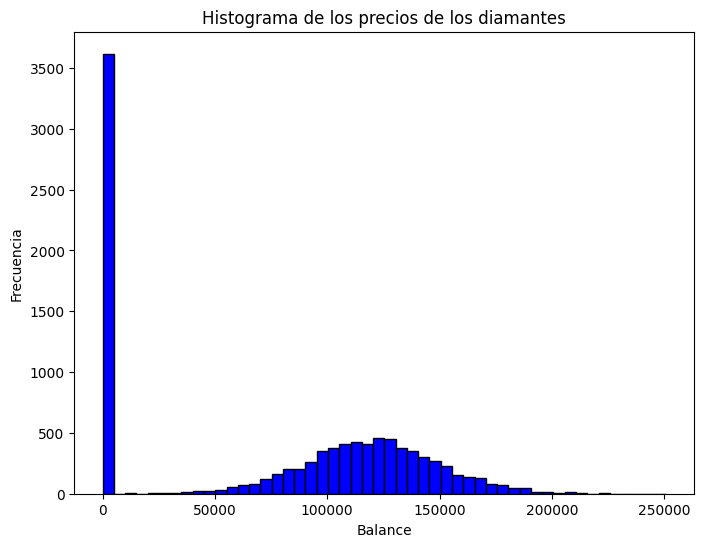

In [5]:
# Crear el histograma para la variable 'Balance'
plt.figure(figsize=(8,6))
plt.hist(df['Balance'], bins=50, color='blue', edgecolor='black')
plt.title('Histograma de los precios de los diamantes')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

La grafica muestra el saldo de la cuenta de los cliente, es un muy buen indicador de la pérdida de clientes, ya que las personas con un saldo más alto en sus cuentas tienen menos probabilidades de dejar el banco en comparación con aquellos con saldos más bajos

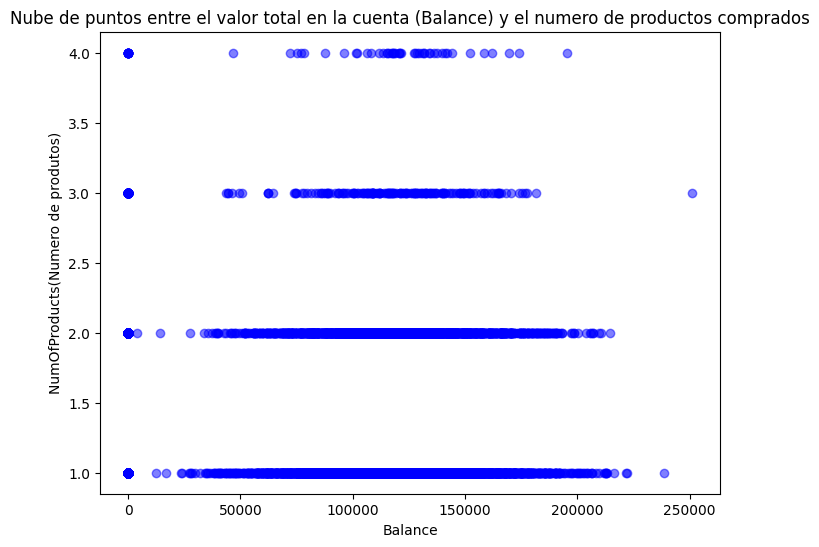

In [6]:
# Crear una nube de puntos (scatter plot) entre 'Balance' y 'NumOfProducts'
plt.figure(figsize=(8,6))
plt.scatter(df['Balance'], df['NumOfProducts'], color='blue', alpha=0.5)
plt.title('Nube de puntos entre el valor total en la cuenta (Balance) y el numero de productos comprados')
plt.xlabel('Balance')
plt.ylabel('NumOfProducts(Numero de produtos)')

# Mostrar la gráfica
plt.show()

In [7]:
correlation = df['Balance'].corr(df['NumOfProducts'])
print(f"Correlación entre Balance y NumOfProducts: {correlation}")

Correlación entre Balance y NumOfProducts: -0.3041797383605491


hay una relación inversa entre las dos variables. Es decir, a medida que el número de productos (NumOfProducts) aumenta, el saldo (Balance) tiende a disminuir, y viceversa.

In [8]:
model = model.fit( df[ ["Balance"] ], df["NumOfProducts"] )

In [9]:
X = df.drop(["NumOfProducts"], axis = 1)
y = df["NumOfProducts"]

y = df["NumOfProducts"]:

Selecciona la columna NumOfProducts como la variable objetivo (target), es decir, lo que el modelo va a intentar predecir. y será una Serie de pandas que contiene el numero de productos con el valor de la cuenta de cada cliente.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=27)

In [11]:
model.fit(X_train[["Balance"]], y_train)
pred = model.predict(X_test[["Balance"]])

In [12]:
try: 
    RMSE = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Squared Error (RMSE):", RMSE)
except Exception as e:
    print(f"Ocurrió un error al ajustar el modelo: {e}")

Root Mean Squared Error (RMSE): 0.5449435281544167


Las predicciones del modelo están a 0.545 unidades (en la misma escala que la variable que se está prediciendo) de los valores reales. Un RMSE más bajo significa que el modelo tiene un mejor desempeño, ya que las predicciones son más cercanas a los valores verdaderos.



In [13]:
k_fold_cv = 20

In [14]:
score_kfold = cross_val_score(model, X[["Balance"]], y, cv=k_fold_cv, scoring="neg_mean_squared_error")

In [15]:
np.sqrt(np.abs(score_kfold))

array([0.54667463, 0.53975798, 0.56876063, 0.53208387, 0.57444327,
       0.60089622, 0.52538292, 0.52201293, 0.56950395, 0.59015705,
       0.58446638, 0.53766555, 0.54403987, 0.53555149, 0.55509788,
       0.56512793, 0.56299509, 0.52570007, 0.56871534, 0.52467085])

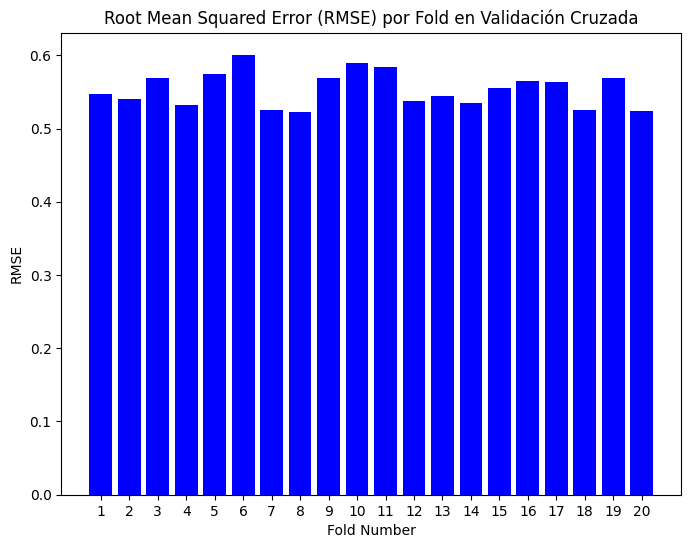

In [16]:
rmse_scores = np.sqrt(np.abs(score_kfold))

# Crear una gráfica de barras
plt.figure(figsize=(8,6))
plt.bar(range(1, len(rmse_scores) + 1), rmse_scores, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) por Fold en Validación Cruzada')
plt.xticks(range(1, len(rmse_scores) + 1))

# Mostrar la gráfica
plt.show()

In [17]:
RMSE_kfold = np.sqrt(np.abs(score_kfold).mean())
# Print the RMSE for k-fold cross-validation
print("Root Mean Squared Error (k-fold CV):", RMSE_kfold)

Root Mean Squared Error (k-fold CV): 0.5541671103920107


aproximadamente 0.554 indica que, en promedio, las predicciones del modelo están a 0.554 unidades de los valores reales. Este valor se interpreta como una medida de error promedio del modelo, y un RMSE más bajo sugiere un mejor ajuste.

In [18]:
# Cargar el conjunto de datos
train_data = pd.read_csv('./dataset/Customer-Churn-Records.csv')

# Eliminar filas con valores faltantes en la columna 'Balance'
train_data.dropna(axis=0, subset=['Balance'], inplace=True)

# Definir la variable objetivo (target)
y = train_data['Balance'] # Asigna la columna 'Balance' como la variable objetivo

# Eliminar la columna 'Balance' del conjunto de características (X)
train_data.drop(['Balance'], axis=1, inplace=True)

# Eliminar la columna 'NumOfProducts' del conjunto de características (X)
train_data.drop(['NumOfProducts'], axis=1, inplace=True)

# Seleccionar solo las columnas numéricas
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]

# Crear el conjunto de características (X) utilizando solo columnas numéricas
X = train_data[numeric_cols].copy()

# Mostrar las dimensiones de X (características) y y (target)
print("Filas y Columnas de los datos: {} y de la variable target: {}".format(X.shape, y.shape))

# Mostrar las primeras filas del conjunto de datos combinado (X y y)
pd.concat([X, y], axis=1).head()

Filas y Columnas de los datos: (10000, 12) y de la variable target: (10000,)


,RowNumber,CustomerId,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Balance
0,1,15634602,619,42,2,1,1,101348.88,1,1,2,464,0.00
1,2,15647311,608,41,1,0,1,112542.58,0,1,3,456,83807.86
2,3,15619304,502,42,8,1,0,113931.57,1,1,3,377,159660.80
3,4,15701354,699,39,1,0,0,93826.63,0,0,5,350,0.00
4,5,15737888,850,43,2,1,1,79084.10,0,0,5,425,125510.82


In [19]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 8000, Test set:2000
Fold:2, Train set: 8000, Test set:2000
Fold:3, Train set: 8000, Test set:2000
Fold:4, Train set: 8000, Test set:2000
Fold:5, Train set: 8000, Test set:2000


En cada pliegue, se reservan 2000 muestras para evaluar el rendimiento del modelo. Este conjunto no se utiliza durante el entrenamiento, lo que permite obtener una estimación más precisa de cómo se comportará el modelo en datos no vistos.

In [20]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [21]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores por fold: {score}')
rmse(score.mean())

Scores por fold: [-3.80667478e+09 -3.85449335e+09 -3.89233937e+09 -3.80748865e+09
 -3.85937552e+09]
rmse= 62000.60


In [22]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores por fold: {score}')
rmse(score.mean())

Scores por fold: [-7.88113145e+09 -7.84797642e+09 -7.80419451e+09 -7.82364668e+09
 -7.75643251e+09]
rmse= 88445.89


In [23]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores por fold: {score}')
rmse(score.mean())

Scores por fold: [-3.94091617e+09 -3.99176325e+09 -4.03327550e+09 -3.93550069e+09
 -3.99326644e+09]
rmse= 63078.87


In [24]:
estimators = [50, 100, 150, 200, 250, 300, 350, 700, 1000]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'Cantidad de Arboles: {count}')
    rmse(score.mean())

Cantidad de Arboles: 50
rmse= 63417.46
Cantidad de Arboles: 100
rmse= 63078.87
Cantidad de Arboles: 150
rmse= 63021.43
Cantidad de Arboles: 200
rmse= 63009.43
Cantidad de Arboles: 250
rmse= 62952.73
Cantidad de Arboles: 300
rmse= 62911.33
Cantidad de Arboles: 350
rmse= 62876.54
Cantidad de Arboles: 700
rmse= 62803.57
Cantidad de Arboles: 1000
rmse= 62785.86
